In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
original_df=df.copy() # for backup
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# categorical columns
cat_col=[col for col in df.columns if df[col].dtype=='object']
print('Categorical columns: ',cat_col)
# Numerical columns
num_col=[col for col in df.columns if df[col].dtype != 'object']
print('Numerical Columns: ',num_col)

Categorical columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [5]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df_clean=df.drop(columns=['Name','Ticket','Cabin'])
df_clean

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [9]:
df.isnull().head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [10]:
df.notnull().tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,True,True,True,True,True,True,True,True,True,True,True,True
872,True,True,True,True,True,True,True,True,True,True,True,True
873,True,True,True,True,True,True,True,True,True,True,False,True
874,True,True,True,True,True,True,True,True,True,True,False,True
875,True,True,True,True,True,True,True,True,True,True,False,True
876,True,True,True,True,True,True,True,True,True,True,False,True
877,True,True,True,True,True,True,True,True,True,True,False,True
878,True,True,True,True,True,False,True,True,True,True,False,True
879,True,True,True,True,True,True,True,True,True,True,True,True
880,True,True,True,True,True,True,True,True,True,True,False,True


In [11]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# returns True for columns that have at least one missing value.
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# returns total number of missing values in the dataframe
df.isnull().sum().sum() # total 866 rows have null values in some columns

np.int64(866)

In [16]:
round((df.isnull().sum()/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [17]:
# remove rows with missing values
df_dropna_rows=df.dropna()
df_dropna_rows.shape

(183, 12)

In [18]:
# remove columns with missing values
df_dropna_cols=df.dropna(axis=1)
df_dropna_cols

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [19]:
from sklearn.impute import SimpleImputer

# impute missing values with mean (for numerical columns)
df_mean_impute=df.copy()
mean_imputer =SimpleImputer(strategy='mean')
df_mean_impute['Age']=mean_imputer.fit_transform(df_mean_impute[['Age']])

df_mean_impute

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [20]:
df_impute=df.copy()
mode_imputer=SimpleImputer(strategy='most_frequent')
df_impute[['Embarked']]=mode_imputer.fit_transform(df_impute[['Embarked']])
# df_impute['Embarked']=mode_imputer.fit_transform(df_impute[['Embarked']]).flatten()

df_impute['Embarked'].isnull().sum()

np.int64(0)

In [21]:
# Forward fill

df_ffill=df.copy()
df_ffill.fillna(method='ffill',inplace=True)

df_ffill.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_6936\2374606459.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill.fillna(method='ffill',inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [22]:
# backward fill
df_bfill=df.copy()
df_bfill.fillna(method='bfill',inplace=True)

df_bfill.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_6936\4019166814.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill.fillna(method='bfill',inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [23]:
# fill with custom value
df_custom=df.copy()
df_custom['Cabin'].fillna('Unknown',inplace=True)

df_custom['Cabin'].isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_6936\1154115944.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_custom['Cabin'].fillna('Unknown',inplace=True)


np.int64(0)

# 13 June, 2026

In [25]:
# categorical columns
cat_cols=df.select_dtypes(include='object')
print('Categorical columns: ',cat_cols.columns.tolist())

# numerical columns
num_col=df.select_dtypes(include='number')
print('Numerical columns: ',num_col.columns.tolist())

Categorical columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


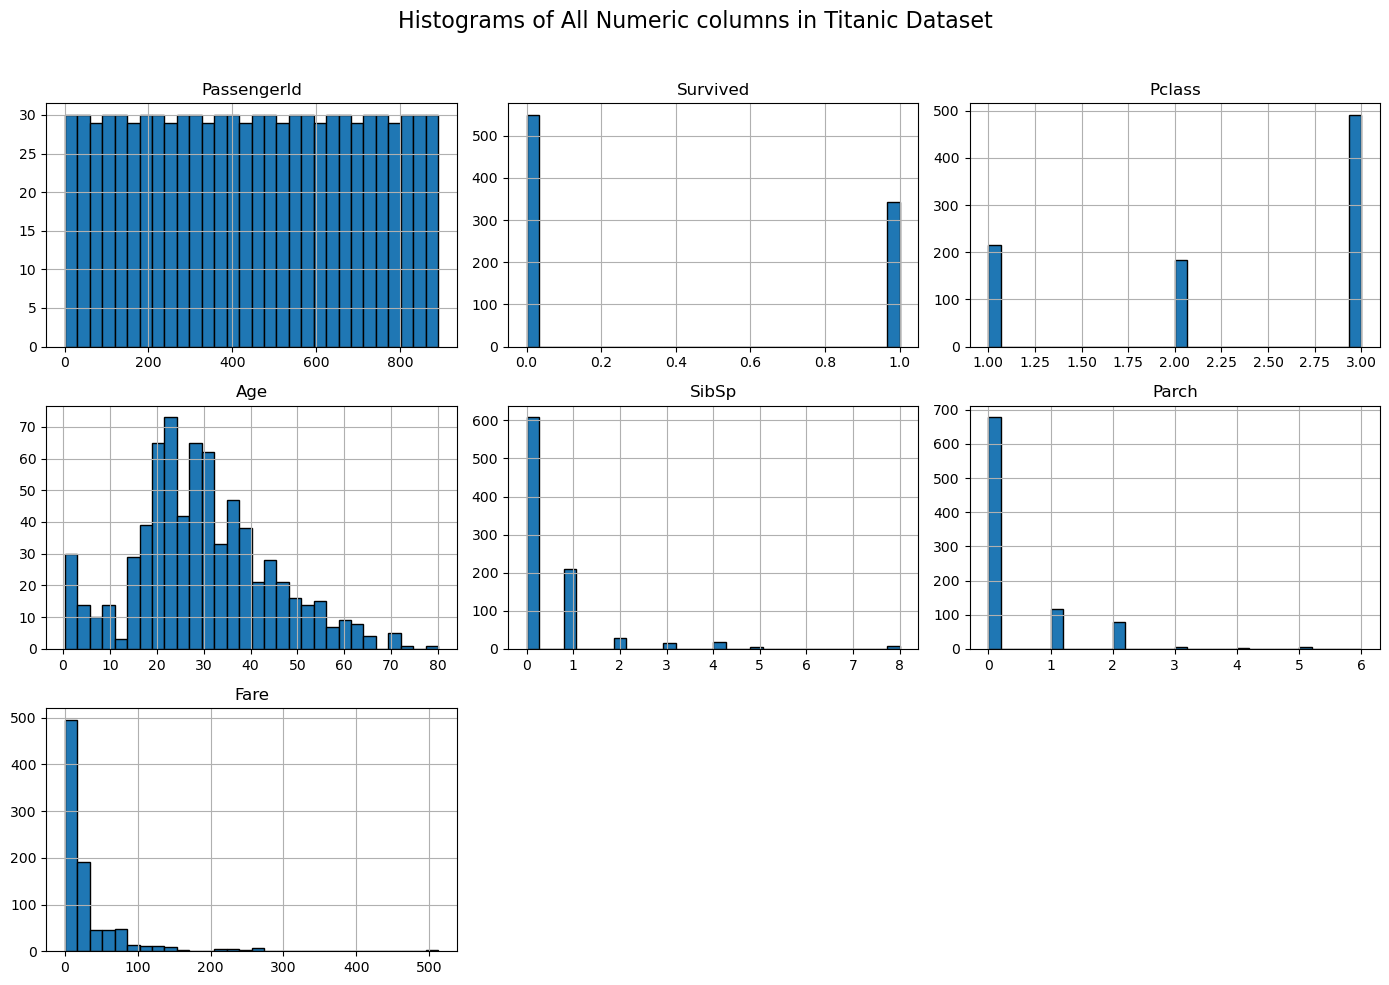

In [ ]:
num_col.hist(bins=30,figsize=(14,10),edgecolor='black')
plt.suptitle('Histograms of All Numeric columns in Titanic Dataset', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])

plt.show()

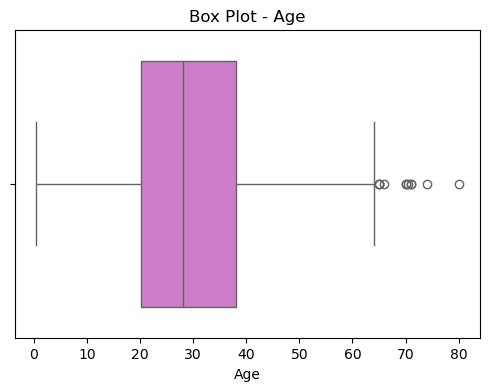

In [42]:
df=original_df
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'],color='orchid')
plt.title('Box Plot - Age')
plt.xlabel('Age')
plt.show()

In [43]:
upper_boundary=df['Age'].mean()+3*df['Age'].std()
lower_boundary=df['Age'].mean()-3*df['Age'].std()
print('Lower Boundary: ',lower_boundary)
print('Upper Boundary: ',upper_boundary)

Lower Boundary:  -13.88037434994331
Upper Boundary:  73.27860964406095


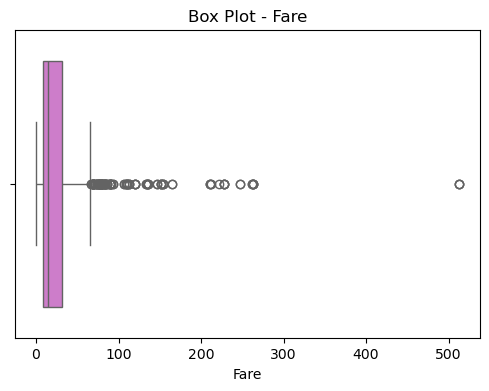

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Fare'],color='orchid')
plt.title('Box Plot - Fare')
plt.xlabel('Fare')
plt.show()

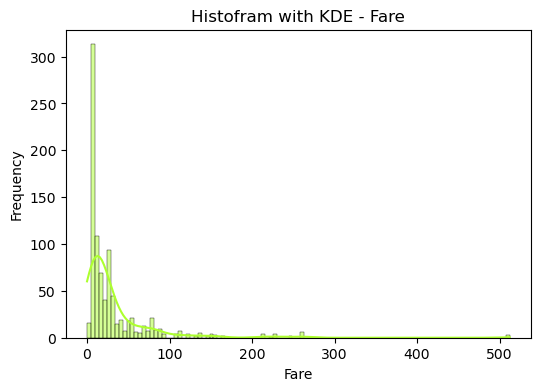

In [49]:
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'],kde=True,color='greenyellow')
plt.title('Histofram with KDE - Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [52]:
IQR=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)
IQR

np.float64(23.0896)

In [54]:
# calculating the boundaries
lower_fence=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_fence=df['Fare'].quantile(0.75)+(IQR*1.5)
print('Lower Boundary: ',lower_fence)
print('Upper Boundary: ',upper_fence)

Lower Boundary:  -26.724
Upper Boundary:  65.6344


In [56]:
from scipy.stats import zscore

# Drop missing Fare values
df = df[['Fare']].dropna()

# calculate Z-score
df['Fare_z'] = zscore(df['Fare'])

# Filter out outliers (Z-score beyond ±3)
df_filtered = df[(df['Fare_z']>= -3) & (df['Fare_z']<=3)]

df_filtered

,Fare,Fare_z
0,7.2500,-0.502445
1,71.2833,0.786845
2,7.9250,-0.488854
3,53.1000,0.420730
4,8.0500,-0.486337
...,...,...
886,13.0000,-0.386671
887,30.0000,-0.044381
888,23.4500,-0.176263
889,30.0000,-0.044381


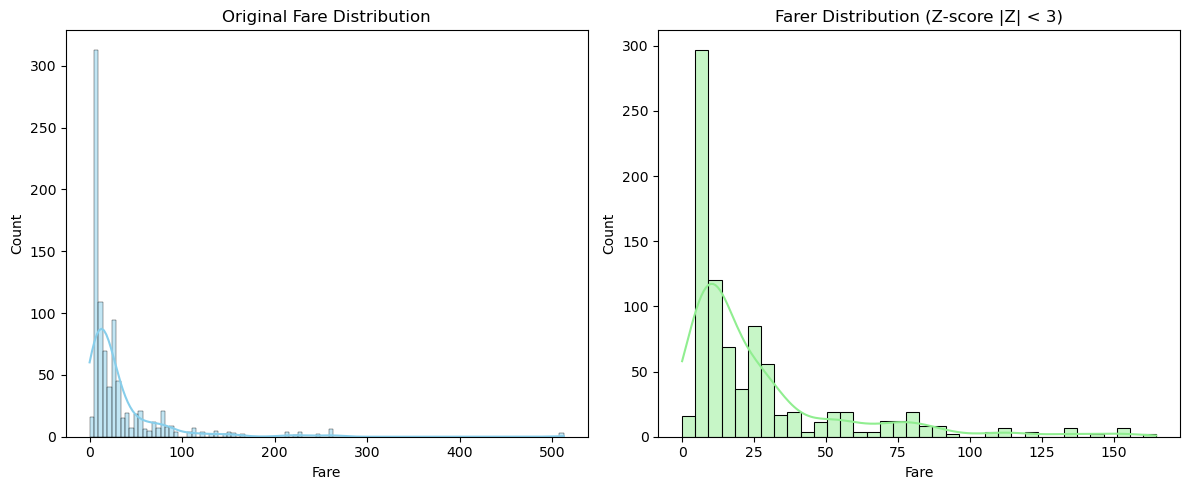

In [57]:
# plotting
plt.figure(figsize=(12,5))

# before removing outliers
plt.subplot(1,2,1)
sns.histplot(df['Fare'],kde=True,color='skyblue')
plt.title('Original Fare Distribution')

# After removing outliers
plt.subplot(1,2,2)
sns.histplot(df_filtered['Fare'],kde=True,color='lightgreen')
plt.title('Farer Distribution (Z-score |Z| < 3)')

plt.tight_layout()
plt.show()

In [59]:
# calculate Q1, Q3, and IQR
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1

# calculate bounds
lower_bound=Q1-3*IQR
upper_bound=Q3+3*IQR

# filter out outliers
df_filtered=df[(df['Fare']>=lower_bound) & (df['Fare']<=upper_bound)]
df_filtered

,Fare,Fare_z
0,7.2500,-0.502445
1,71.2833,0.786845
2,7.9250,-0.488854
3,53.1000,0.420730
4,8.0500,-0.486337
...,...,...
886,13.0000,-0.386671
887,30.0000,-0.044381
888,23.4500,-0.176263
889,30.0000,-0.044381


In [60]:
median_fare=df_filtered['Fare'].median()
df['Fare_replaced']=df['Fare'].apply(
    lambda x: median_fare if x > upper_bound or x < lower_bound else x
)

In [61]:
median_fare=df_filtered['Fare'].median()
df['Fare_replaced']=df['Fare'].apply(
    lambda x: median_fare if x > upper_bound or x < lower_bound else x
)